# Data Cleaning and Analysis 2

* Customer churn

* Dataset is available on Kaggle with a creative commons license.
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

* Can download it from github repo

## Exercise 1 - reading the data

In [1]:
import pandas as pd

churn = pd.read_csv("Data/BankChurners.csv")

churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Exercise 2 - reading the data partially

* Note from the dataset provider: PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING

In [2]:
churn.shape

(10127, 23)

In [3]:
churn = pd.read_csv("Data/BankChurners.csv", usecols=range(0, 21))

In [4]:
churn.shape

(10127, 21)

In [5]:
churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Exercise 3 - renaming columns

* Card_Category -> use card_category (snake case) or CardCategory (camel case)

In [6]:
churn.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [7]:
rename_columns = {col:col.replace("_", "") for col in churn.columns}

rename_columns

{'CLIENTNUM': 'CLIENTNUM',
 'Attrition_Flag': 'AttritionFlag',
 'Customer_Age': 'CustomerAge',
 'Gender': 'Gender',
 'Dependent_count': 'Dependentcount',
 'Education_Level': 'EducationLevel',
 'Marital_Status': 'MaritalStatus',
 'Income_Category': 'IncomeCategory',
 'Card_Category': 'CardCategory',
 'Months_on_book': 'Monthsonbook',
 'Total_Relationship_Count': 'TotalRelationshipCount',
 'Months_Inactive_12_mon': 'MonthsInactive12mon',
 'Contacts_Count_12_mon': 'ContactsCount12mon',
 'Credit_Limit': 'CreditLimit',
 'Total_Revolving_Bal': 'TotalRevolvingBal',
 'Avg_Open_To_Buy': 'AvgOpenToBuy',
 'Total_Amt_Chng_Q4_Q1': 'TotalAmtChngQ4Q1',
 'Total_Trans_Amt': 'TotalTransAmt',
 'Total_Trans_Ct': 'TotalTransCt',
 'Total_Ct_Chng_Q4_Q1': 'TotalCtChngQ4Q1',
 'Avg_Utilization_Ratio': 'AvgUtilizationRatio'}

In [8]:
churn.rename(columns=rename_columns).head()

,CLIENTNUM,AttritionFlag,CustomerAge,Gender,Dependentcount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,Monthsonbook,...,MonthsInactive12mon,ContactsCount12mon,CreditLimit,TotalRevolvingBal,AvgOpenToBuy,TotalAmtChngQ4Q1,TotalTransAmt,TotalTransCt,TotalCtChngQ4Q1,AvgUtilizationRatio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Exercise 4 - Python and Pandas string operations

In [9]:
churn.columns[1]

'Attrition_Flag'

In [10]:
# split here is a Python string method
churn.columns[1].split("_")

['Attrition', 'Flag']

In [11]:
pd.Series(churn.columns[1].split("_")).str.lower()

0    attrition
1         flag
dtype: object

In [12]:
pd.Series(churn.columns[1].split("_")).str.lower().str.cat(sep="_")

'attrition_flag'

In [13]:
churn.columns[0]

'CLIENTNUM'

In [14]:
pd.Series(churn.columns[0].split("_")).str.lower().str.cat(sep="_")

'clientnum'

## Exercise 5 - renaming columns - snake case

In [15]:
rename_columns = {
    
    col:pd.Series(col.split("_")).str.lower().str.cat(sep="_") for col in churn.columns

}

rename_columns

{'CLIENTNUM': 'clientnum',
 'Attrition_Flag': 'attrition_flag',
 'Customer_Age': 'customer_age',
 'Gender': 'gender',
 'Dependent_count': 'dependent_count',
 'Education_Level': 'education_level',
 'Marital_Status': 'marital_status',
 'Income_Category': 'income_category',
 'Card_Category': 'card_category',
 'Months_on_book': 'months_on_book',
 'Total_Relationship_Count': 'total_relationship_count',
 'Months_Inactive_12_mon': 'months_inactive_12_mon',
 'Contacts_Count_12_mon': 'contacts_count_12_mon',
 'Credit_Limit': 'credit_limit',
 'Total_Revolving_Bal': 'total_revolving_bal',
 'Avg_Open_To_Buy': 'avg_open_to_buy',
 'Total_Amt_Chng_Q4_Q1': 'total_amt_chng_q4_q1',
 'Total_Trans_Amt': 'total_trans_amt',
 'Total_Trans_Ct': 'total_trans_ct',
 'Total_Ct_Chng_Q4_Q1': 'total_ct_chng_q4_q1',
 'Avg_Utilization_Ratio': 'avg_utilization_ratio'}

In [16]:
churn = churn.rename(columns=rename_columns)

churn.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Exercise 6 - display more columns

In [17]:
pd.get_option("display.max_columns")

20

In [18]:
churn.shape

(10127, 21)

In [19]:
pd.set_option("display.max_columns", 25)

In [20]:
churn.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


* "display.max_rows"
* "display.max_colwidth"
* "display.precision"

## Exercise 7 - missing values

In [21]:
churn.isna().sum()

clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [22]:
churn.isna().sum().sum()

0

## Exercise 8 - dropping redundant columns

In [23]:
churn = churn.drop(["clientnum"], axis=1)

churn.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [24]:
# could have not read it initially
pd.read_csv("Data/BankChurners.csv", usecols=range(1, 21)).head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Exercise 9 - replacing values in the targer variable

In [25]:
churn.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [26]:
churn["attrition_flag"].value_counts()

attrition_flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [27]:
churn["attrition_flag"] = churn["attrition_flag"].replace({"Existing Customer": 0, "Attrited Customer": 1})

churn["attrition_flag"].value_counts()

attrition_flag
0    8500
1    1627
Name: count, dtype: int64

## Exercise 10 - income category

In [28]:
churn.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [29]:
# better to replace $ for visual purposes
churn["income_category"].value_counts()

income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [30]:
churn["income_category"] = churn["income_category"].str.replace("$", "", regex=False)

churn["income_category"].value_counts()

income_category
Less than 40K    3561
40K - 60K        1790
80K - 120K       1535
60K - 80K        1402
Unknown          1112
120K +            727
Name: count, dtype: int64

## Example 11 - income vs churn

In [31]:
churn.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0,45,M,3,High School,Married,60K - 80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than 40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,80K - 120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than 40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,60K - 80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [32]:
churn.groupby(["income_category"])["attrition_flag"].mean()

income_category
120K +           0.173315
40K - 60K        0.151397
60K - 80K        0.134807
80K - 120K       0.157655
Less than 40K    0.171862
Unknown          0.168165
Name: attrition_flag, dtype: float64

In [33]:
churn.groupby(["income_category"])["attrition_flag"].agg(["mean", "count"])

,mean,count
income_category,,
120K +,0.173315,727
40K - 60K,0.151397,1790
60K - 80K,0.134807,1402
80K - 120K,0.157655,1535
Less than 40K,0.171862,3561
Unknown,0.168165,1112


In [34]:
churn.groupby(["income_category"])["attrition_flag"].agg(["mean", "count"]).sort_values(by="mean")

,mean,count
income_category,,
60K - 80K,0.134807,1402
40K - 60K,0.151397,1790
80K - 120K,0.157655,1535
Unknown,0.168165,1112
Less than 40K,0.171862,3561
120K +,0.173315,727


## Example 12 - gender vs churn

In [35]:
churn.groupby(["gender"])["attrition_flag"].agg(["mean", "count"]).sort_values(by="mean")

,mean,count
gender,,
M,0.146152,4769
F,0.173572,5358


In [36]:
churn.groupby(["gender", "education_level"])["attrition_flag"].agg(["mean", "count"])

mean  count
gender education_level                 
F      College          0.148496    532
       Doctorate        0.249027    257
       Graduate         0.175449   1670
       High School      0.167315   1028
       Post-Graduate    0.167300    263
       Uneducated       0.159548    796
       Unknown          0.185961    812
M      College          0.155925    481
       Doctorate        0.159794    194
       Graduate         0.133059   1458
       High School      0.136041    985
       Post-Graduate    0.189723    253
       Uneducated       0.159190    691
       Unknown          0.148515    707

## Example 13 - card category vs churn

In [37]:
churn["card_category"].value_counts()

card_category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [38]:
churn.groupby(["card_category"])["attrition_flag"].agg(["mean", "count"]).sort_values(by="mean")

,mean,count
card_category,,
Silver,0.147748,555
Blue,0.160979,9436
Gold,0.181034,116
Platinum,0.250000,20


## Exercise 14 - total transaction amount vs churn

In [39]:
churn[["attrition_flag", "total_trans_amt"]].corr()

,attrition_flag,total_trans_amt
attrition_flag,1.000000,-0.168598
total_trans_amt,-0.168598,1.000000


## Exercise 15

In [40]:
churn.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0,45,M,3,High School,Married,60K - 80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than 40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,80K - 120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than 40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,60K - 80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [41]:
churn[["attrition_flag", "total_trans_amt", "credit_limit", "total_revolving_bal"]].corr()

,attrition_flag,total_trans_amt,credit_limit,total_revolving_bal
attrition_flag,1.000000,-0.168598,-0.023873,-0.263053
total_trans_amt,-0.168598,1.000000,0.171730,0.064370
credit_limit,-0.023873,0.171730,1.000000,0.042493
total_revolving_bal,-0.263053,0.064370,0.042493,1.000000


## Exercise 16 - plotting the transaction amounts

<AxesSubplot: ylabel='Density'>

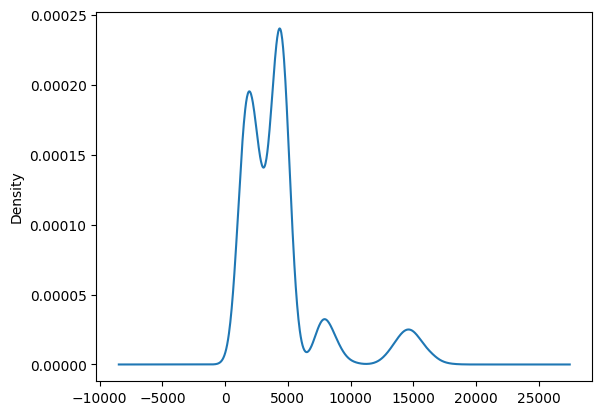

In [42]:
churn["total_trans_amt"].plot(kind="kde")

<AxesSubplot: ylabel='Frequency'>

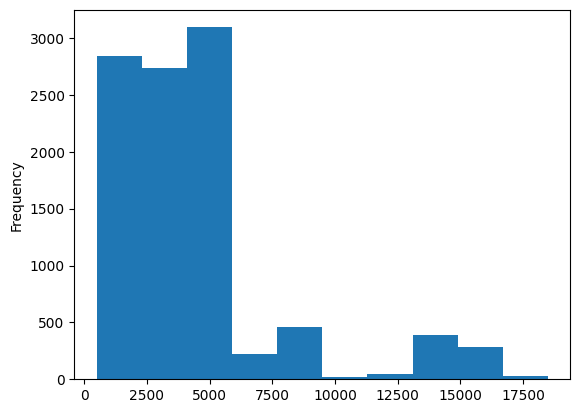

In [43]:
churn["total_trans_amt"].plot(kind="hist")

## Exercise 17 - transaction count change vs churn

<AxesSubplot: ylabel='Frequency'>

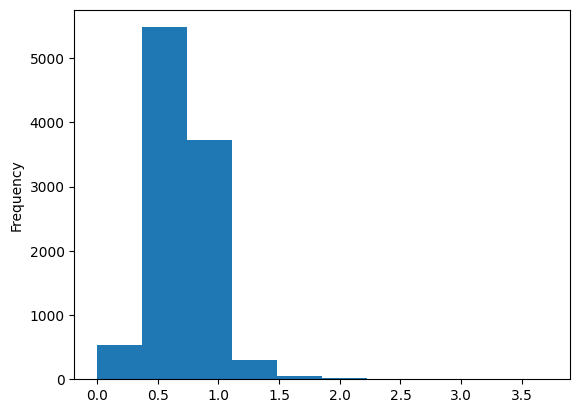

In [44]:
churn["total_ct_chng_q4_q1"].plot(kind="hist")

In [45]:
churn[["attrition_flag", "total_ct_chng_q4_q1"]].corr()

,attrition_flag,total_ct_chng_q4_q1
attrition_flag,1.000000,-0.290054
total_ct_chng_q4_q1,-0.290054,1.000000


## Exercise 18 - dependent count vs churn

In [46]:
churn["dependent_count"].value_counts()

dependent_count
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: count, dtype: int64

In [47]:
churn.groupby(["dependent_count"])["attrition_flag"].agg(["mean", "count"]).sort_values(by="mean")

,mean,count
dependent_count,,
1,0.146355,1838
0,0.149336,904
5,0.150943,424
2,0.157062,2655
4,0.165184,1574
3,0.176428,2732
